<div style="text-align: left;" role="presentation">
<h1 role="presentation"><strong><span role="presentation">Lecci&oacute;n 15 Miércoles 10 de Junio</span></strong></h1>

# Reducción de ruido de una imagen en el dominio espacial:

* Sea $A\in\mathbb{R}^{m\times n}$ a escala de grises en formato double (en el intérvalo $[0,1]$). Consideraremos una imagen con ruido aditivo $N\in\mathbb{R}^{m\times n}$, esta imagen con ruido se representa con la imagen $B\in\mathbb{R}^{m\times n}$, es decir

$$B = A + N$$

## Tecnicas para eliminar ruido aditivo en el dominio espacial.

### 1. Filtro del promedio:

* Sea $W$ un vecindario de un pixel

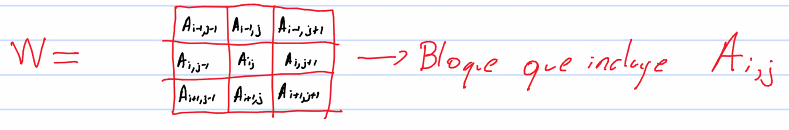

* La imagen W se le conoce como ventana. Entonces el filtro promedio está dado por la siguiente fórmula:

$$\hat{A}_{i,j} = \frac{1}{m \cdot n} \cdot \sum_{(r,c) \in W} {A_{r,c}}
$$

donde $mxn$ es el tamaño de $W$, $\hat {A}$ es la imagen restaurada, $r$ y $c$ representan el numero de fila y columna, respectivamente.


In [13]:
%Tarea implementar promedio%

### 2. Filtro promedio geométrico:

* $A\in\mathbb{R}^{m\times n}$, la imagen con ruido. Este filtro está definido por la fórmula 

$$\hat{A}_{i,j} = \left \lceil \prod_{(r,c) \ in W} {A_{r,c}} \right \rceil^ \frac {1}{m \cdot n}$$

* **Nota:** Este filtro se utiliza frecuentemente cuando se tiene un ruido de tipo Gausianno

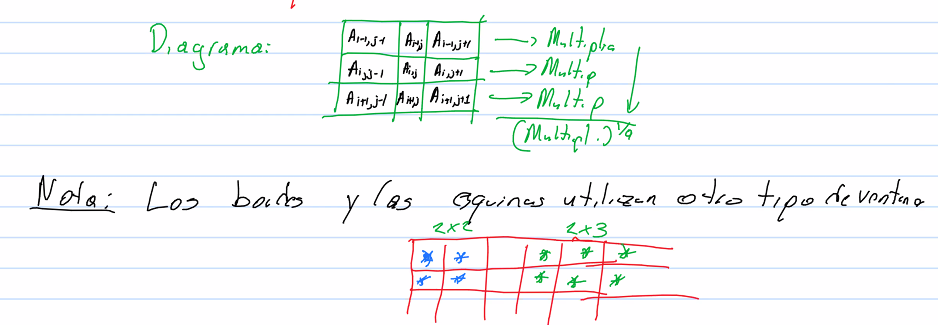


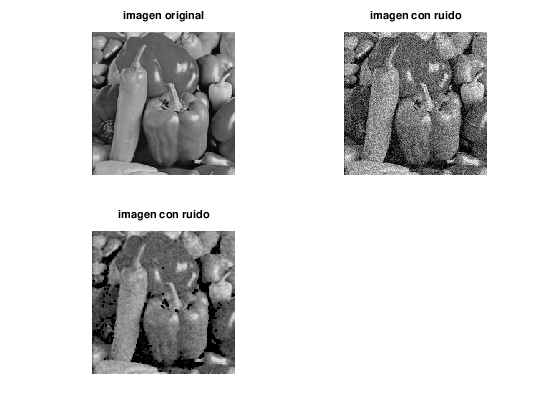

In [14]:
%Ejemplo de Filtro Promedio Geometrico%

clc; clear; close all
pkg load image

A = imread("files/peppers.jpg");
subplot(2,2,1)
imshow(A)
title('imagen original')

A = im2double(A);
[m,n] = size(A);
N = 0.1 * randn(m,n);

B = A+N;

B = im2uint8(B);
subplot(2,2,2)
imshow(B)
title('imagen con ruido')

%%%Tarea: Realizar el filtro en los bordes.

B = im2double(B);
C = B;
for i = 2:m-1
    for j = 2:n-1
        Wf1 = B(i-1, j-1) * B(i-1, j) * B(i-1, j+1);
        Wf2 = B(i, j-1) * B(i, j) * B(i, j+1);
        Wf3 = B(i+1, j-1) * B(i+1, j) * B(i+1, j+1);
        C(i,j) = (Wf1 * Wf2 * Wf3) ^ (1/9);
    end
end

C = im2uint8(C);
subplot(2,2,3)
imshow(C)
title('imagen con ruido')


### 3. Filtro armónico promedio:

* $A\in\mathbb{R}^{p\times q}$ una imagen con ruido. El filtro armonico promedio esta dado por la formula 

$$\hat{A}_{i,j} = \frac {m \cdot n}{ \sum_{(r,c) \in W}^{} \cdot \frac{1}{g(r,c)} }$$

**NOTA:**
1. si $g(r,c) = 0$ entonces se omite
2. Se utiliza este filtro en imagenes con ruido gausseano y el ruido de tipo sal.

### 4. Filtro contrarmonico Promedio:

* Sea $A\in\mathbb{R}^{p\times q}$ una imagen con ruido, entonces el filtro contra armonico promedio de orden $R$, se define como

$$\hat{A}_{i,j} = \frac {\sum_{(r,c)}}{}$$

### 5. Filtro de la mediana:

* Ya se estudio en el tema de comvolucion.

### 6. Filtro del máximo y minimo: 

* Sea $A\in\mathbb{R}^{p\times q}$ con ruido, entonces:

* **Máximo:**

$$\hat{A}_{i,j} = max \left ( \frac{A_{i,j}} {(i,j) \in W} \right )$$

* **Minimo:**

$$\hat{A}_{i,j} = min \left ( \frac{A_{i,j}} {(i,j) \in W} \right )$$

### 7. Filtro del punto medio:

$$A_{i,j} = \frac{max \left ( \frac{A_{i,j}} {(i,j) \in W} \right ) + min \left ( \frac{A_{i,j}} {(i,j) \in W} \right )}{2} $$